In [1]:
%load_ext autoreload
%autoreload 2


In [26]:
import io
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple
from IPython.display import clear_output
from numpy.typing import NDArray
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter


In [3]:
from qml.model.gate import get_gateset, Gate, GateInfo
from qml.model.unit import Unit, EmbedUnit, EntangleUnit
from qml.model.model import Model
from qml.tools.trainer import calc_gradients
from qml.tools.dataloader import DataLoader
from qml.tools.evaluator import Evaluator
from qml.optimizer.localsearch import LocalSearchOptimizer


In [4]:
%matplotlib inline
np.set_printoptions(precision=3, floatmode='fixed')


## Hypper parameters

In [28]:
# circuit
nq = 2
ng = 3
num_trial_unit = 9

# dataset
nx = 1
num_train_data = 20
num_test_data = 20
gateset = get_gateset(nq)

# optimization
shots = 50
num_iter =  100
variance = 0.3


## Dataset

In [5]:
target_func = lambda x: np.sin(np.pi * x)


In [7]:
train_xs = np.random.uniform(-1, 1, num_train_data)
train_ys = target_func(train_xs)
train_data = [train_xs, train_ys]

test_xs = np.random.uniform(-1, 1, num_test_data)
test_ys = target_func(test_xs)
test_data = [test_xs, test_ys]


## Prepare

In [16]:
optim = LocalSearchOptimizer(train_data, test_data, shots=shots, variance=variance)


## Train round=1

In [11]:
emb_unit = EmbedUnit.generate_ry_arcsin_embed_unit("emb", nq, nx, gateset=gateset)


In [10]:
tr1_units = [
    Unit.generate_random_unit(f"tr1_{i}", nq, ng, gateset=gateset)
    for i in range(num_trial_unit)
]


In [12]:
en1_unit = EntangleUnit.new_neighbor_cz("en1", nq, gateset=gateset)


In [13]:
models1 = [
    Model(nq, 1, emb_unit, [], [tr1_unit, en1_unit])
    for tr1_unit in tr1_units
]


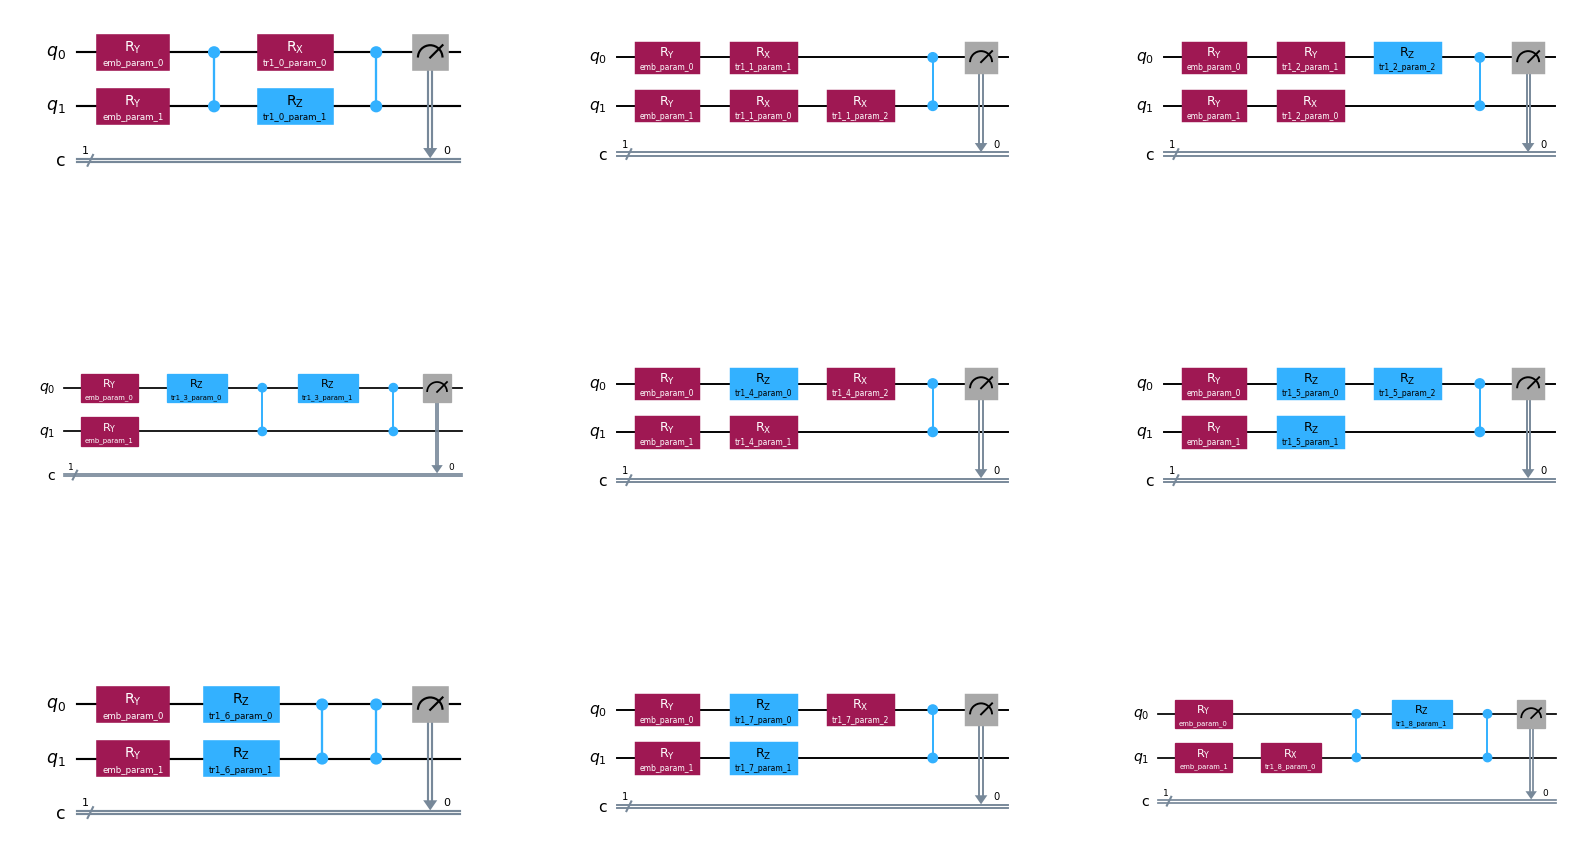

In [22]:
fig1, axes1 = plt.subplots(nrows=3, ncols=3, figsize=(18, 6))
for ax, model in zip(axes1.flatten(), models1):
    model.draw(ax=ax)
fig1.savefig("model1.png")


Step:100 | Energy current:0.731  best:0.731


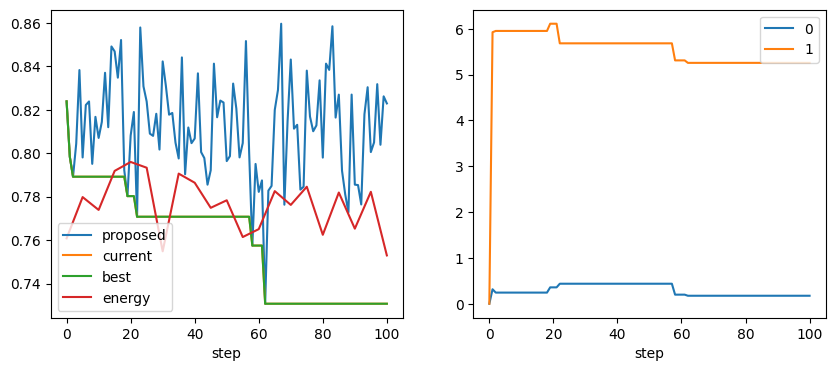

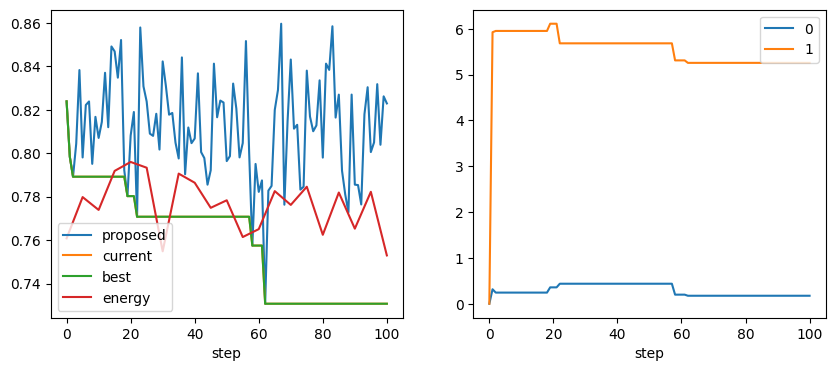

In [29]:
results1 = []
log_time = []
for i, model in enumerate(models1):
    time_avons = time.time()
    res = optim.optimize(model, num_iter, verbose=True)
    results1.append(res)
    res.draw(fig_name=f"results/fig/result1-{i}.png")
    time_apres = time.time()
    calc_time = time_apres - time_avons
    log_time.append(calc_time)


In [37]:
times1 = np.asarray(log_time)
energies1 = np.asarray([res.first.energy for res in results1])
pd_results1 = pd.DataFrame(dict(
    no=np.arange(num_trial_unit), time=times1, energy=energies1
))
pd_results1.to_csv("results/log1.csv")


In [38]:
best_unit_no1 = energies1.argmin()
best_unit_no1


np.int64(2)

## Trial round=2

In [45]:
fixed_units2 = [tr1_units[best_unit_no1], en1_unit]


In [48]:
tr2_units = [
    Unit.generate_random_unit(f"tr2_{i}", nq, ng, gateset=gateset)
    for i in range(num_trial_unit)
]


In [42]:
en2_unit = EntangleUnit.new_neighbor_cz("en2", nq, gateset=gateset)


In [49]:
models2 = [
    Model(nq, 1, emb_unit, fixed_units2, [tr2_unit, en2_unit])
    for tr2_unit in tr2_units
]


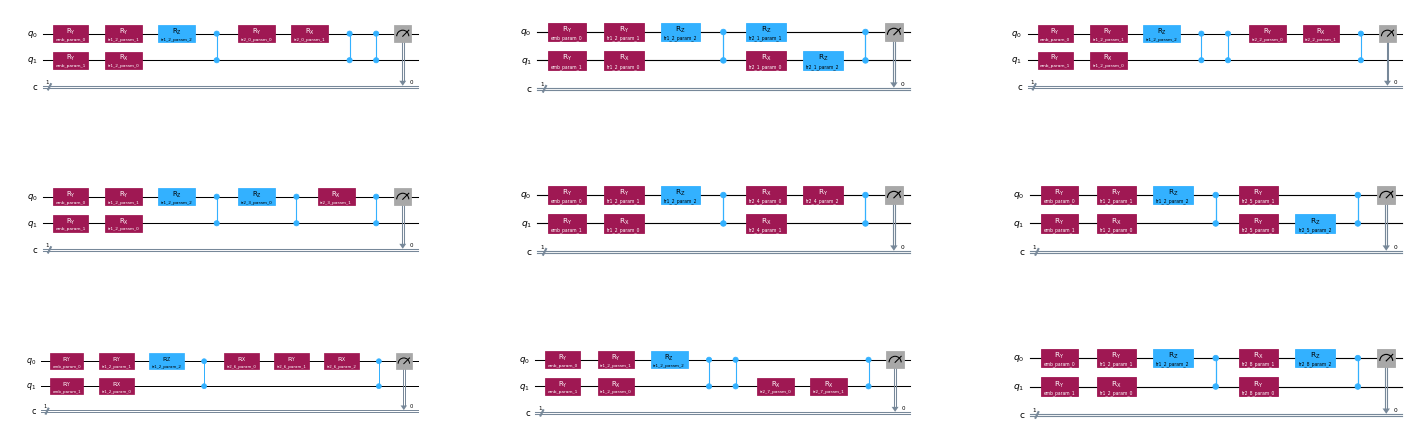

In [52]:
fig2, axes2 = plt.subplots(nrows=3, ncols=3, figsize=(18, 6))
for ax, model in zip(axes2.flatten(), models2):
    model.draw(ax=ax)
fig2.savefig("model2.png")


Step:100 | Energy current:0.418  best:0.418


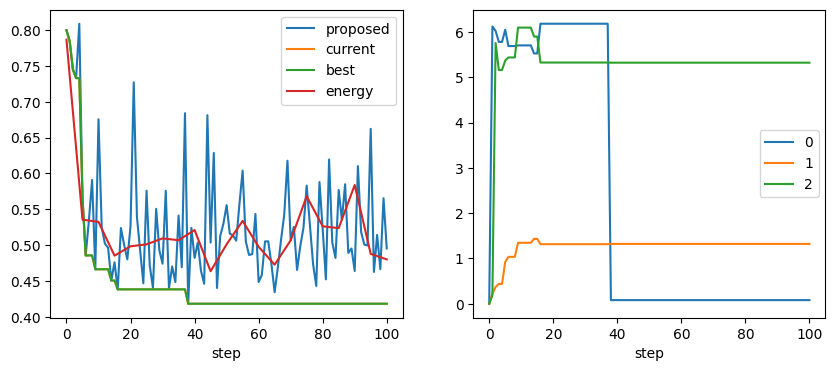

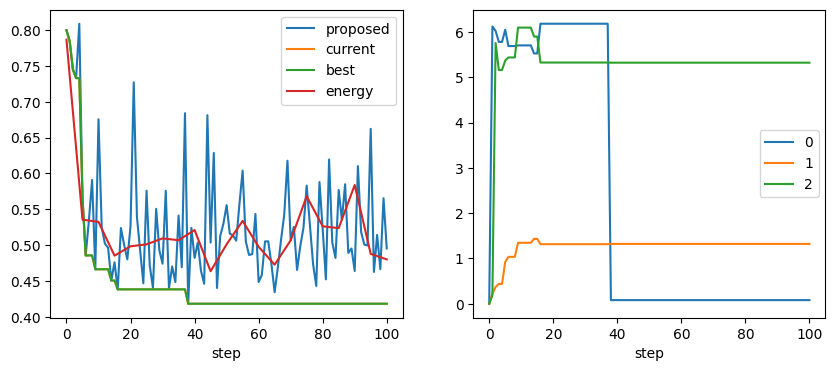

In [53]:
results2 = []
log_time = []
for i, model in enumerate(models2):
    time_avons = time.time()
    res = optim.optimize(model, num_iter, verbose=True)
    results2.append(res)
    res.draw(fig_name=f"results/fig/result2-{i}.png")
    time_apres = time.time()
    calc_time = time_apres - time_avons
    log_time.append(calc_time)


In [58]:
times2 = np.asarray(log_time)
energies2 = np.asarray([res.first.energy for res in results2])
pd_results2 = pd.DataFrame(dict(
    no=np.arange(num_trial_unit), time=times2, energy=energies2
))
pd_results2.to_csv("results/log2.csv")


In [57]:
energies2


array([0.122, 0.764, 0.149, 0.161, 0.123, 0.114, 0.126, 0.745, 0.418])

In [56]:
best_unit_no2 = energies2.argmin()
best_unit_no2


np.int64(5)

## Trial round=3

In [63]:
fixed_units3 = [tr1_units[best_unit_no1], en1_unit, tr2_units[best_unit_no2], en2_unit]


In [60]:
tr3_units = [
    Unit.generate_random_unit(f"tr3_{i}", nq, ng, gateset=gateset)
    for i in range(num_trial_unit)
]


In [61]:
en3_unit = EntangleUnit.new_neighbor_cz("en3", nq, gateset=gateset)


In [64]:
models3 = [
    Model(nq, 1, emb_unit, fixed_units3, [tr3_unit, en3_unit])
    for tr3_unit in tr3_units
]


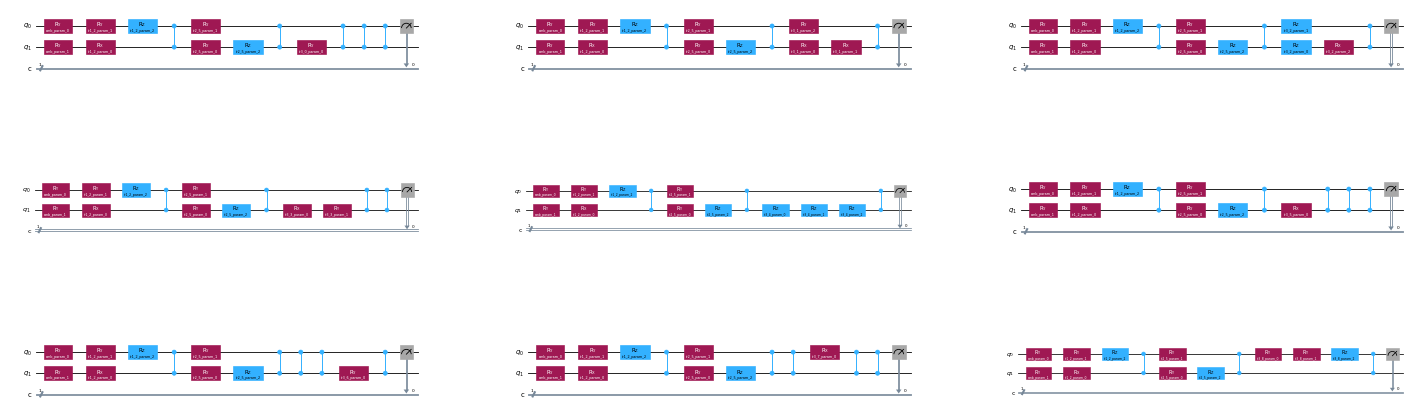

In [65]:
fig3, axes3 = plt.subplots(nrows=3, ncols=3, figsize=(18, 6))
for ax, model in zip(axes3.flatten(), models3):
    model.draw(ax=ax)
fig3.savefig("results/fig/model3.png")


Step:100 | Energy current:0.152  best:0.152


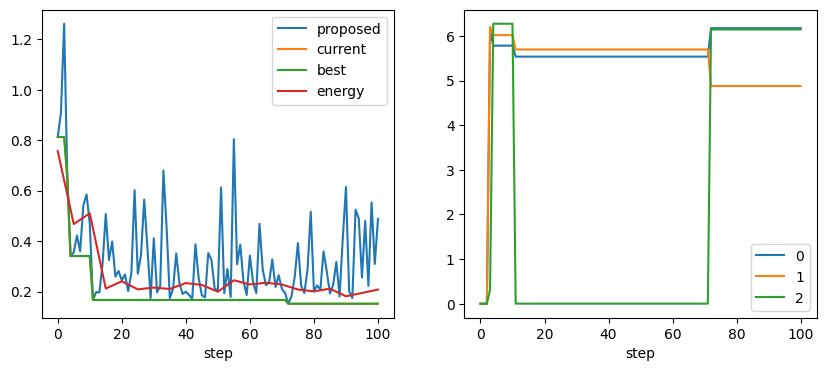

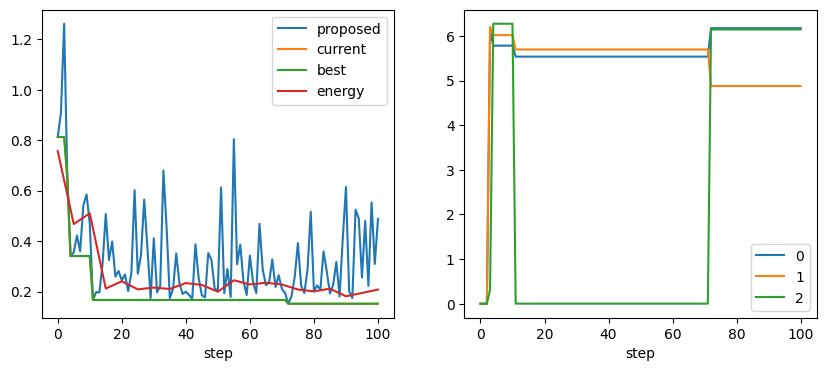

In [66]:
results3 = []
log_time = []
for i, model in enumerate(models3):
    time_avons = time.time()
    res = optim.optimize(model, num_iter, verbose=True)
    results3.append(res)
    res.draw(fig_name=f"results/fig/result3-{i}.png")
    time_apres = time.time()
    calc_time = time_apres - time_avons
    log_time.append(calc_time)


In [68]:
times3 = np.asarray(log_time)
energies3 = np.asarray([res.first.energy for res in results3])
pd_results3 = pd.DataFrame(dict(
    no=np.arange(num_trial_unit), time=times3, energy=energies3
))
pd_results3.to_csv("results/log3.csv")


In [69]:
best_unit_no3 = energies3.argmin()
best_unit_no3


np.int64(8)

# summary

In [76]:
model_ex = Model(nq, 1, emb_unit, [], [
    tr1_units[best_unit_no1], en1_unit,
    tr2_units[best_unit_no2], en2_unit,
    # tr3_units[best_unit_no3], en3_unit,
])


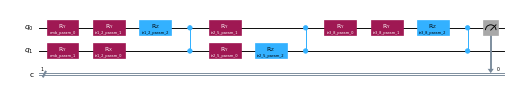

In [77]:
fig, ax = plt.subplots()
model_ex.draw(ax=ax)


Step:100 | Energy current:0.134  best:0.134


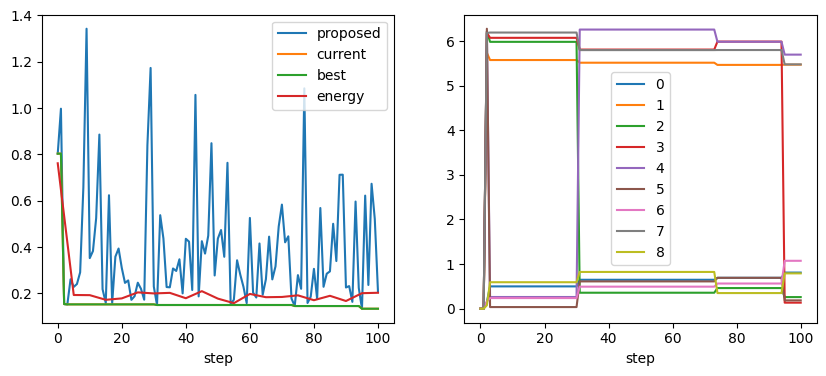

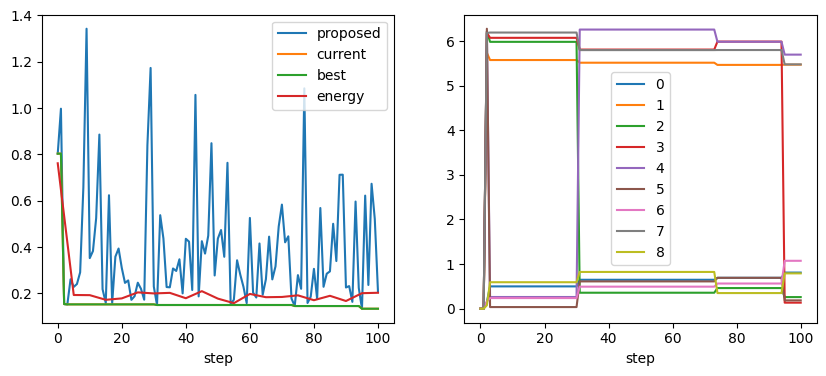

In [78]:
time_avons = time.time()
res = optim.optimize(model_ex, num_iter, verbose=True)
res.draw(fig_name=f"results/fig/result_ex.png")
time_apres = time.time()


In [81]:
res.first


Solution(x=array([0.809960297763227, 5.470524461738829, 0.2608340475128132,
       0.1359676651963797, 5.6954205615152595, 0.18700433914917058,
       1.0740519222373732, 5.4769555703118264, 0.7923484645300887],
      dtype=object), energy=np.float64(0.13391175941384847))

In [79]:
calc_time_ex = time_apres - time_avons
calc_time_ex


65.6407458782196

Step:200 | Energy current:0.160  best:0.160


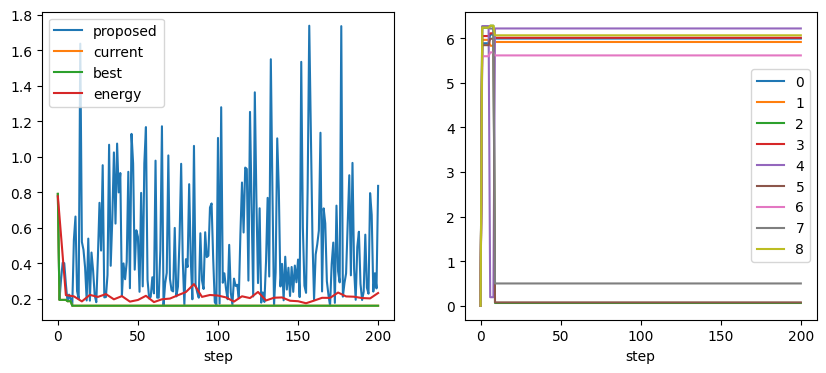

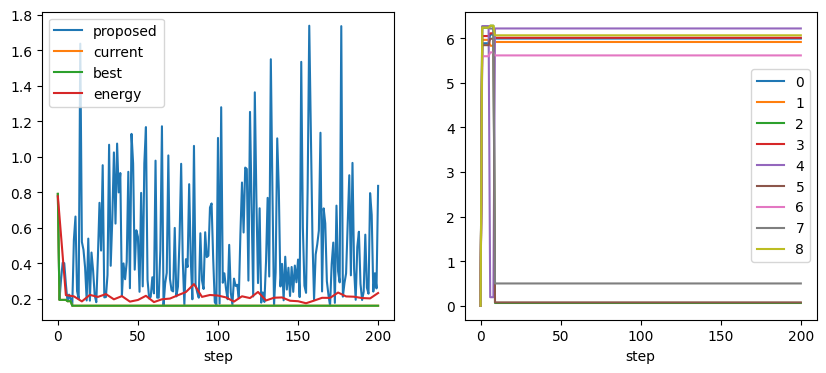

173.4952311515808

In [82]:
time_avons = time.time()
res2 = optim.optimize(model_ex, num_iter*2, verbose=True)
res2.draw(fig_name=f"results/fig/result_ex2.png")
time_apres = time.time()
calc_time_ex2 = time_apres - time_avons
calc_time_ex2


In [83]:
res2.first


Solution(x=array([5.992469987145003, 5.9153494278852, 0.06139276634748381,
       6.009824327721534, 6.218893429235974, 0.07448830857871691,
       5.614362284419845, 0.4994046368830336, 6.065292559729353],
      dtype=object), energy=np.float64(0.16016481944615663))